# Car Price Prediction using Machine Learning

# Importing  the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns



# Data Collection and Processing

In [3]:
#loading the data from csv file to pandas dataframe
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# first 5 rows of the dataframe
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#checking no of rows and columns
df.shape

(205, 26)

In [15]:
#checking the number of missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Distribution of the values of the price column

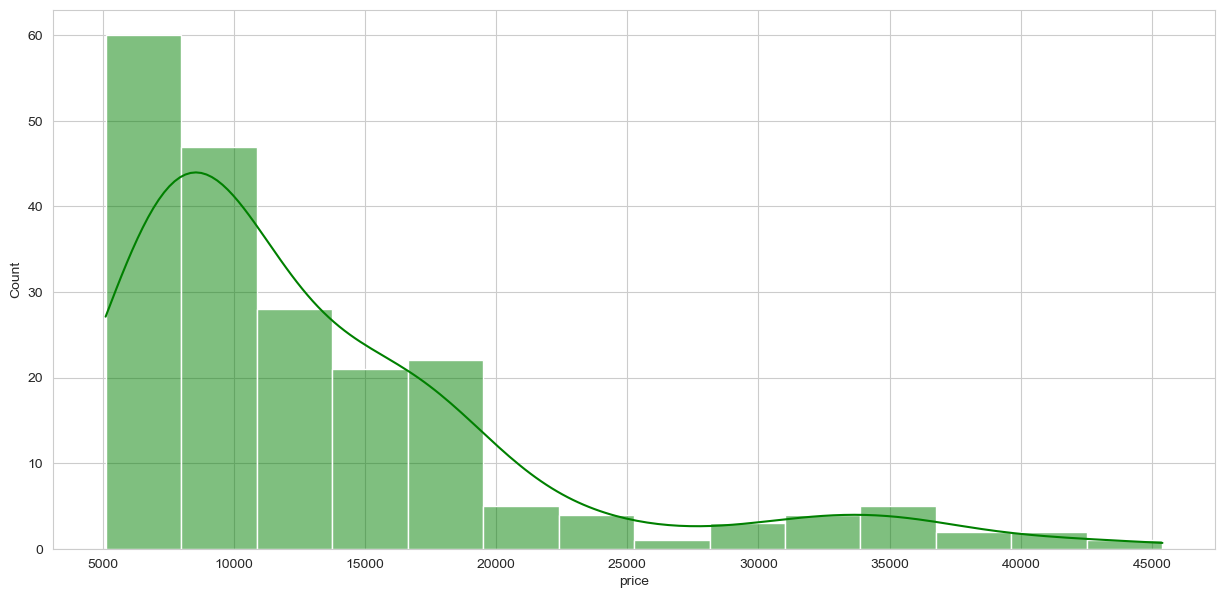

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.histplot(df.price,kde= True, color='green')
plt.show()

# Correlation matrics

C:\Users\Hello\AppData\Local\Temp\ipykernel_2160\4265658335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation between the columns')

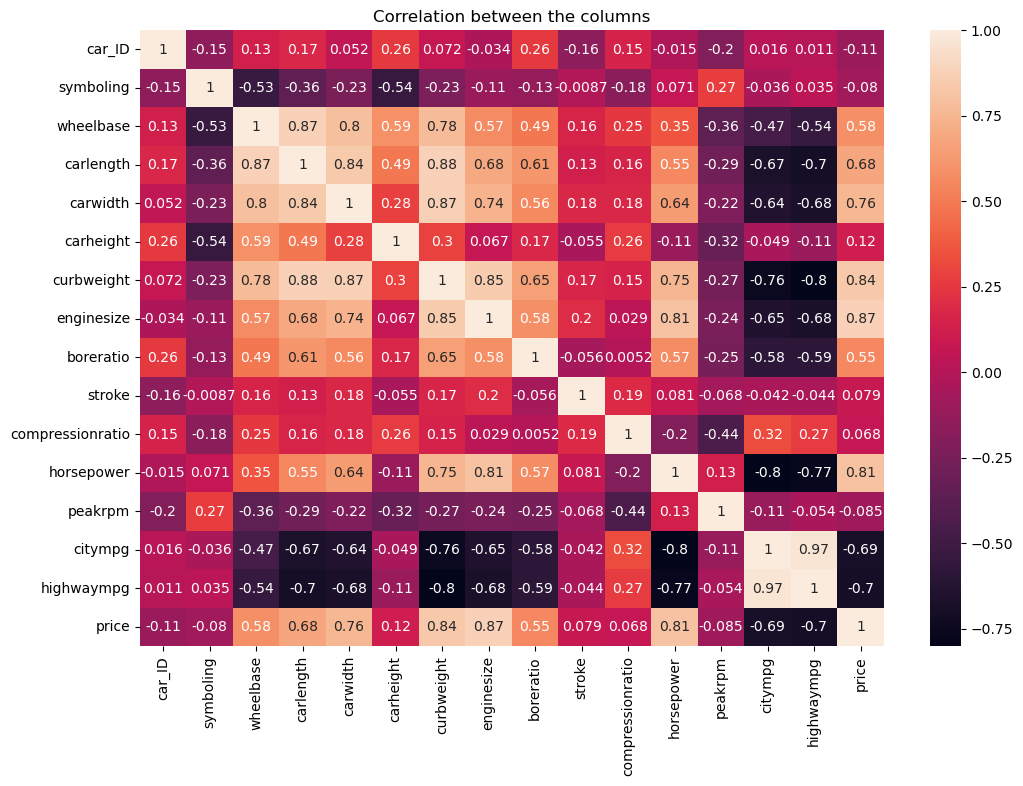

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the columns")

# Splitting the data into Training data and Testing data

In [25]:
x = df.drop(['price','CarName','fueltype','car_ID','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis = 1)
y = df['price'].values
print(f"x shape : {x.shape} y shape : {y.shape}")

x shape : (205, 14) y shape : (205,)


In [16]:
print(x)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68            

In [26]:
print(y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

# Splitting Training and test data

In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25,random_state=42)
print("x-train : ",x_train.shape)
print("x-test : ",x_test.shape)
print("y-train : ",y_train.shape)
print("y-test : ",y_test.shape)

x-train :  (153, 14)
x-test :  (52, 14)
y-train :  (153,)
y-test :  (52,)


# Model Training

In [21]:
#loading the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [12]:
#prediction on training data
pred = model.predict(x_test)

In [22]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ",(metrics.mean_squared_error(pred,y_test)))
print("MAE : ",(metrics.mean_absolute_error(pred,y_test)))
print("R2 Score : ",(metrics.r2_score(pred,y_test)))

MSE :  12778023.312240602
MAE :  2539.741611561823
R2 Score :  0.7961095379581435


# Visualize the actual price and predicted prices

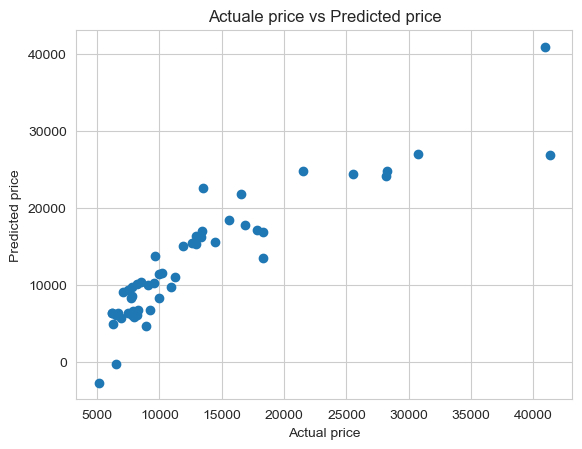

In [28]:
plt.scatter(y_test,pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actuale price vs Predicted price")
plt.show()

In [14]:
pred2 = model.predict([[3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27]])
pred2.round(2)

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13579.49])